**EDA First Task of Internship in Technocolab Inc**




**import libraries which we need.**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

**Load the dataset**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
data1 = pd.read_csv("/content/tc20171021.csv",on_bad_lines='skip')
data2 = pd.read_csv("/content/true_car_listings.csv")

**Understanding the data**

Some Features are understood from their name in dataset

Vin : vehicle identification number unique for each car

Make : brand of the vehicle

Model : Vehicle Model

In [ ]:
data1.head()

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


In [ ]:
data2.head()


,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


with shape function it clearly define clearly no of columns and rows.

In [ ]:
data1.shape

(1216250, 9)

In [ ]:
data2.shape

(852122, 8)

**`Preprocessing The Data `**

In [ ]:
#Remove the ID coloumn from dataset. and clearly we can analyze it exsist in first dataset.

data1.drop('Id',axis=1,inplace=True)
data1

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
...,...,...,...,...,...,...,...,...
1216245,79900,2017,25,East Hanover,NJ,YV4BC0ZX0H1128239,Volvo,XC90T8
1216246,80895,2017,10,Corte Madera,CA,YV4BC0ZX0H1124188,Volvo,XC90T8
1216247,68755,2018,2500,Englewood,NJ,YV4A22PL4J1212676,Volvo,XC90T6
1216248,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6


In [ ]:
#Merging the 2 datasets

data_cars = pd.concat([data1 , data2])
data_cars

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience
...,...,...,...,...,...,...,...,...
852117,63215,2017,9,Culver City,CA,YV1A22MK9H1013237,Volvo,S90T6
852118,72260,2017,3201,Englewood,NJ,YV4A22PL3H1186162,Volvo,XC90T6
852119,55999,2016,28941,Fort Collins,CO,YV4A22PL4G1000868,Volvo,XC90AWD
852120,60240,2017,3005,San Leandro,CA,YV4A22NLXH1006162,Volvo,V90


**3.3 Columns' Types**

In [ ]:
data_cars.dtypes

#or data_cars.info()
#object mean string data..

Price       int64
Year        int64
Mileage     int64
City       object
State      object
Vin        object
Make       object
Model      object
dtype: object

**3.4 Missing Data**

In [ ]:
#Missing values
data_cars.isnull().sum()

#woha! we have no missing data..

Price      0
Year       0
Mileage    0
City       0
State      0
Vin        0
Make       0
Model      0
dtype: int64

**3.5 Statistical Analysis:**


**Numerical Feature Analysis**

In [ ]:
data_cars.describe()
data_cars.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Price,Year,Mileage
count,2068372.00000,2068372.00000,2068372.00000
mean,21172.89393,2013.29974,52743.18481
std,13343.30920,3.43081,68361.42084
min,1500.00000,1997.00000,5.00000
25%,12995.00000,2012.00000,23910.00000
50%,18000.00000,2014.00000,40423.00000
75%,26817.00000,2016.00000,72504.00000
max,499500.00000,2018.00000,77587763.00000


**Categorical Features Analysis**

In [ ]:
#Removing Duplicate Vins

data_cars.drop_duplicates(subset="Vin",keep=False,inplace=True)
data_cars

,Price,Year,Mileage,City,State,Vin,Make,Model
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
5,17020,2016,16877,Grand Island,NY,KL4CJASB7GB536760,Buick,EncoreFWD
6,15950,2015,27885,West Covina,CA,KL4CJASB3FB241802,Buick,EncoreFWD
9,17700,2015,13807,Jacksonville,NC,KL4CJBSB8FB068543,Buick,EncoreConvenience
12,17491,2016,11123,Memphis,TN,KL4CJASBXGB720588,Buick,EncoreFWD
...,...,...,...,...,...,...,...,...
841516,16490,2013,28969,Chehalis,WA,WVWHV7AJXDW068975,Volkswagen,"GTI4-Door,"
842983,14990,2013,61299,Ansonia,CT,WVWHV7AJ2DW134371,Volkswagen,"GTI4-Door,"
843029,17909,2013,36275,Charlotte,NC,WVWHV7AJ0DW009210,Volkswagen,"GTI4-Door,"
846250,18995,2013,43079,Mission,TX,WVWHV7AJ5DW082797,Volkswagen,"GTI4-Door,"


Handling States' names

In [ ]:
data_cars['State'].unique()


array([' IN', ' NY', ' CA', ' NC', ' TN', ' FL', ' TX', ' OK', ' GA',
       ' OH', ' AZ', ' LA', ' Fl', ' NJ', ' MD', ' IL', ' WI', ' PA',
       ' MA', ' KY', ' KS', ' RI', ' OR', ' AL', ' MS', ' MO', ' SC',
       ' AR', ' VA', ' IA', ' NH', ' MI', ' NE', ' CO', ' ME', ' VT',
       ' NV', ' UT', ' CT', ' WA', ' MN', ' NM', ' WY', ' WV', ' DE',
       ' ND', ' AK', ' ID', ' HI', ' Ga', ' SD', ' MT', ' ga', ' Va',
       ' Ca', ' Az', ' Md', ' Oh', ' DC'], dtype=object)

Comment: here we can see clearly redundancy occur in dataset like AZ, Az and many more now we will do folloing.

In [ ]:
data_cars['State']=data_cars['State'].str.upper()
liste=data_cars['State'].unique()
print(liste)
liste.shape

[' IN' ' NY' ' CA' ' NC' ' TN' ' FL' ' TX' ' OK' ' GA' ' OH' ' AZ' ' LA'
 ' NJ' ' MD' ' IL' ' WI' ' PA' ' MA' ' KY' ' KS' ' RI' ' OR' ' AL' ' MS'
 ' MO' ' SC' ' AR' ' VA' ' IA' ' NH' ' MI' ' NE' ' CO' ' ME' ' VT' ' NV'
 ' UT' ' CT' ' WA' ' MN' ' NM' ' WY' ' WV' ' DE' ' ND' ' AK' ' ID' ' HI'
 ' SD' ' MT' ' DC']


(51,)

Upper case the other column


In [ ]:
data_cars['City']=data_cars['City'].str.upper()
data_cars['Make']=data_cars['Make'].str.upper()
data_cars['Model']=data_cars['Model'].str.upper()
data_cars

,Price,Year,Mileage,City,State,Vin,Make,Model
1,15749,2015,27592,HIGHLAND,IN,KL4CJASB5FB245057,BUICK,ENCOREFWD
5,17020,2016,16877,GRAND ISLAND,NY,KL4CJASB7GB536760,BUICK,ENCOREFWD
6,15950,2015,27885,WEST COVINA,CA,KL4CJASB3FB241802,BUICK,ENCOREFWD
9,17700,2015,13807,JACKSONVILLE,NC,KL4CJBSB8FB068543,BUICK,ENCORECONVENIENCE
12,17491,2016,11123,MEMPHIS,TN,KL4CJASBXGB720588,BUICK,ENCOREFWD
...,...,...,...,...,...,...,...,...
841516,16490,2013,28969,CHEHALIS,WA,WVWHV7AJXDW068975,VOLKSWAGEN,"GTI4-DOOR,"
842983,14990,2013,61299,ANSONIA,CT,WVWHV7AJ2DW134371,VOLKSWAGEN,"GTI4-DOOR,"
843029,17909,2013,36275,CHARLOTTE,NC,WVWHV7AJ0DW009210,VOLKSWAGEN,"GTI4-DOOR,"
846250,18995,2013,43079,MISSION,TX,WVWHV7AJ5DW082797,VOLKSWAGEN,"GTI4-DOOR,"


Dividing into new and old datasets

In [ ]:
#here we can do in many ways but i  choose to set avg according to dataset.
avg=data_cars['Year'].mean()
avg

2013.4261940469953

In [ ]:
#Old Dataset

Old_set=data_cars.loc[data_cars.Year < avg]
Old_set.sort_values(by='Year')

,Price,Year,Mileage,City,State,Vin,Make,Model
921265,64950,1997,122075,BELLEVUE,WA,SALDV2245VA113287,LAND,ROVER
948400,3950,1997,97953,SWANNANOA,NC,1LNLM91V4VY628938,LINCOLN,MARK
992664,4888,1997,188403,TUCSON,AZ,2MELM75WXVX723465,MERCURY,GRAND
655482,8995,1997,81728,SAN JUAN CAPISTRANO,CA,1FTEX08L7VKC08548,FORD,F-150XLT
1070489,3695,1997,85108,BOISE,ID,1P4GP44R9VB435536,PLYMOUTH,VOYAGER3
...,...,...,...,...,...,...,...,...
822178,15250,2013,71823,LIBERTYVILLE,IL,5XYZTDLB2DG011102,HYUNDAI,SANTA
822200,8999,2013,43861,WEST PARK,FL,5NPDH4AE4DH441716,HYUNDAI,ELANTRALIMITED
822201,14995,2013,48725,ORLANDO,FL,KMHGC4DD0DU239651,HYUNDAI,GENESIS3.8
822026,17497,2013,47196,ST. LOUIS,MO,5XYZU3LB8DG123619,HYUNDAI,SANTA


In [ ]:
# Now new dataset turn
New_set=data_cars.loc[data_cars.Year >= avg]
New_set.sort_values(by='Year')

,Price,Year,Mileage,City,State,Vin,Make,Model
823251,28995,2014,33188,WEST ISLIP,NY,5TDDK3DC5ES089098,TOYOTA,"SIENNALIMITED,"
626293,20888,2014,15859,PHOENIX,AZ,1FMCU0J98EUC45509,FORD,ESCAPETITANIUM
967535,20250,2014,62583,MIAMI GARDENS,FL,WDCGG5HB8EG284354,MERCEDES-BENZ,GLK-CLASSGLK350
626277,14373,2014,60367,MADISON,GA,1ZVBP8AM6E5318278,FORD,MUSTANGCOUPE
967538,22995,2014,26047,AVON,MA,WDDSJ4GB8EN132217,MERCEDES-BENZ,CLA-CLASSCLA250
...,...,...,...,...,...,...,...,...
979739,38225,2018,18,LEAGUE CITY,TX,WDCTG4EB6JJ406719,MERCEDES-BENZ,GLAGLA
1116213,18445,2018,27,PHOENIX,AZ,2T1BURHE2JC977567,TOYOTA,COROLLALE
526637,45475,2018,620,LAKEVILLE,MN,1GNERKKW4JJ109900,CHEVROLET,TRAVERSEFWD
790895,38497,2018,3056,NORTH RICHLAND HILLS,TX,5FNRL6H77JB003869,HONDA,ODYSSEYEX-L


Excluding relatively not used cars

In [ ]:
Not_used_cars=data_cars[data_cars.Mileage <= 50 ]
Used_cars=data_cars[data_cars.Mileage > 50 ]
Used_cars.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
1,15749,2015,27592,HIGHLAND,IN,KL4CJASB5FB245057,BUICK,ENCOREFWD
5,17020,2016,16877,GRAND ISLAND,NY,KL4CJASB7GB536760,BUICK,ENCOREFWD
6,15950,2015,27885,WEST COVINA,CA,KL4CJASB3FB241802,BUICK,ENCOREFWD
9,17700,2015,13807,JACKSONVILLE,NC,KL4CJBSB8FB068543,BUICK,ENCORECONVENIENCE
12,17491,2016,11123,MEMPHIS,TN,KL4CJASBXGB720588,BUICK,ENCOREFWD


**Feature Engineering**

***Car usage levels ***

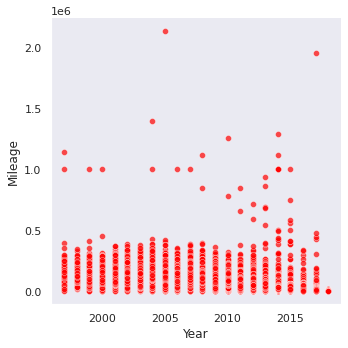

In [ ]:
import seaborn as sns
sns.set_theme(style="dark")
sns.relplot(x="Year", y="Mileage",
            sizes=(40, 400), 
            height=5, alpha=.7, data=Used_cars, color= 'red')

**The Price of the car affected by the State of the seller?**

Text(0, 0.5, 'price')

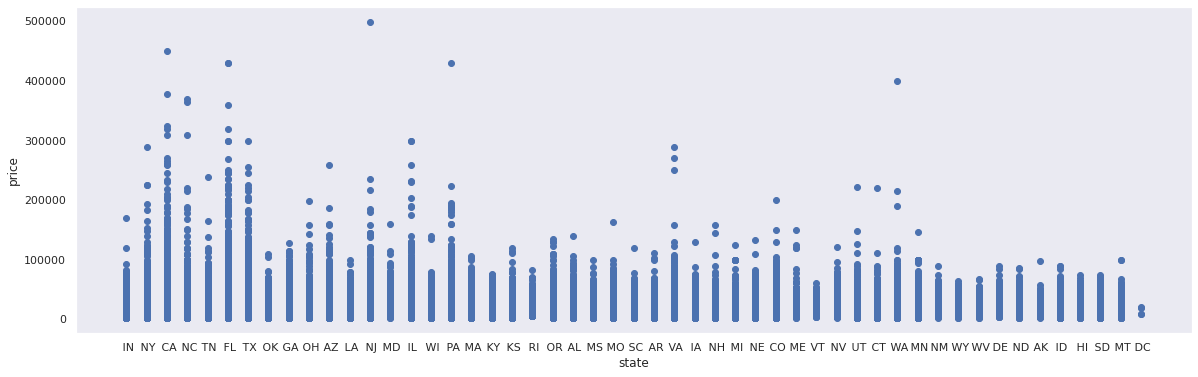

In [ ]:
plt.figure(figsize=(20,6))
plt.scatter(x='State',y='Price',data=data_cars)
plt.xlabel('state')
plt.ylabel('price')

**How the Price of a certain brand cars' changes according the year of manufacturing?**

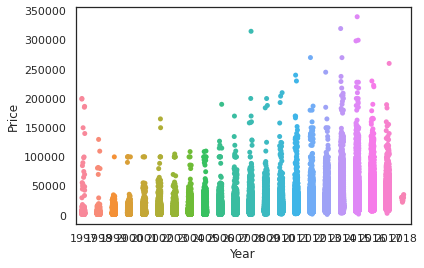

In [ ]:
sns.stripplot(x ='Year', y ='Price', data = data_cars ,
              jitter = True, dodge = True)

**There is any relation between the Year and the Milage?**

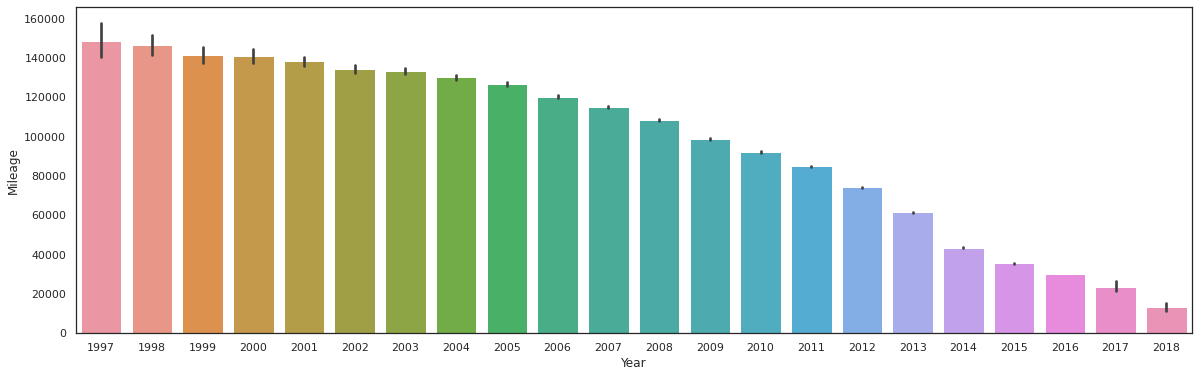

In [ ]:
plt.figure(figsize=(20,6))
sns.barplot(x='Year',y='Mileage',data=data_cars)


**What is the distribution of the cars in the market?**

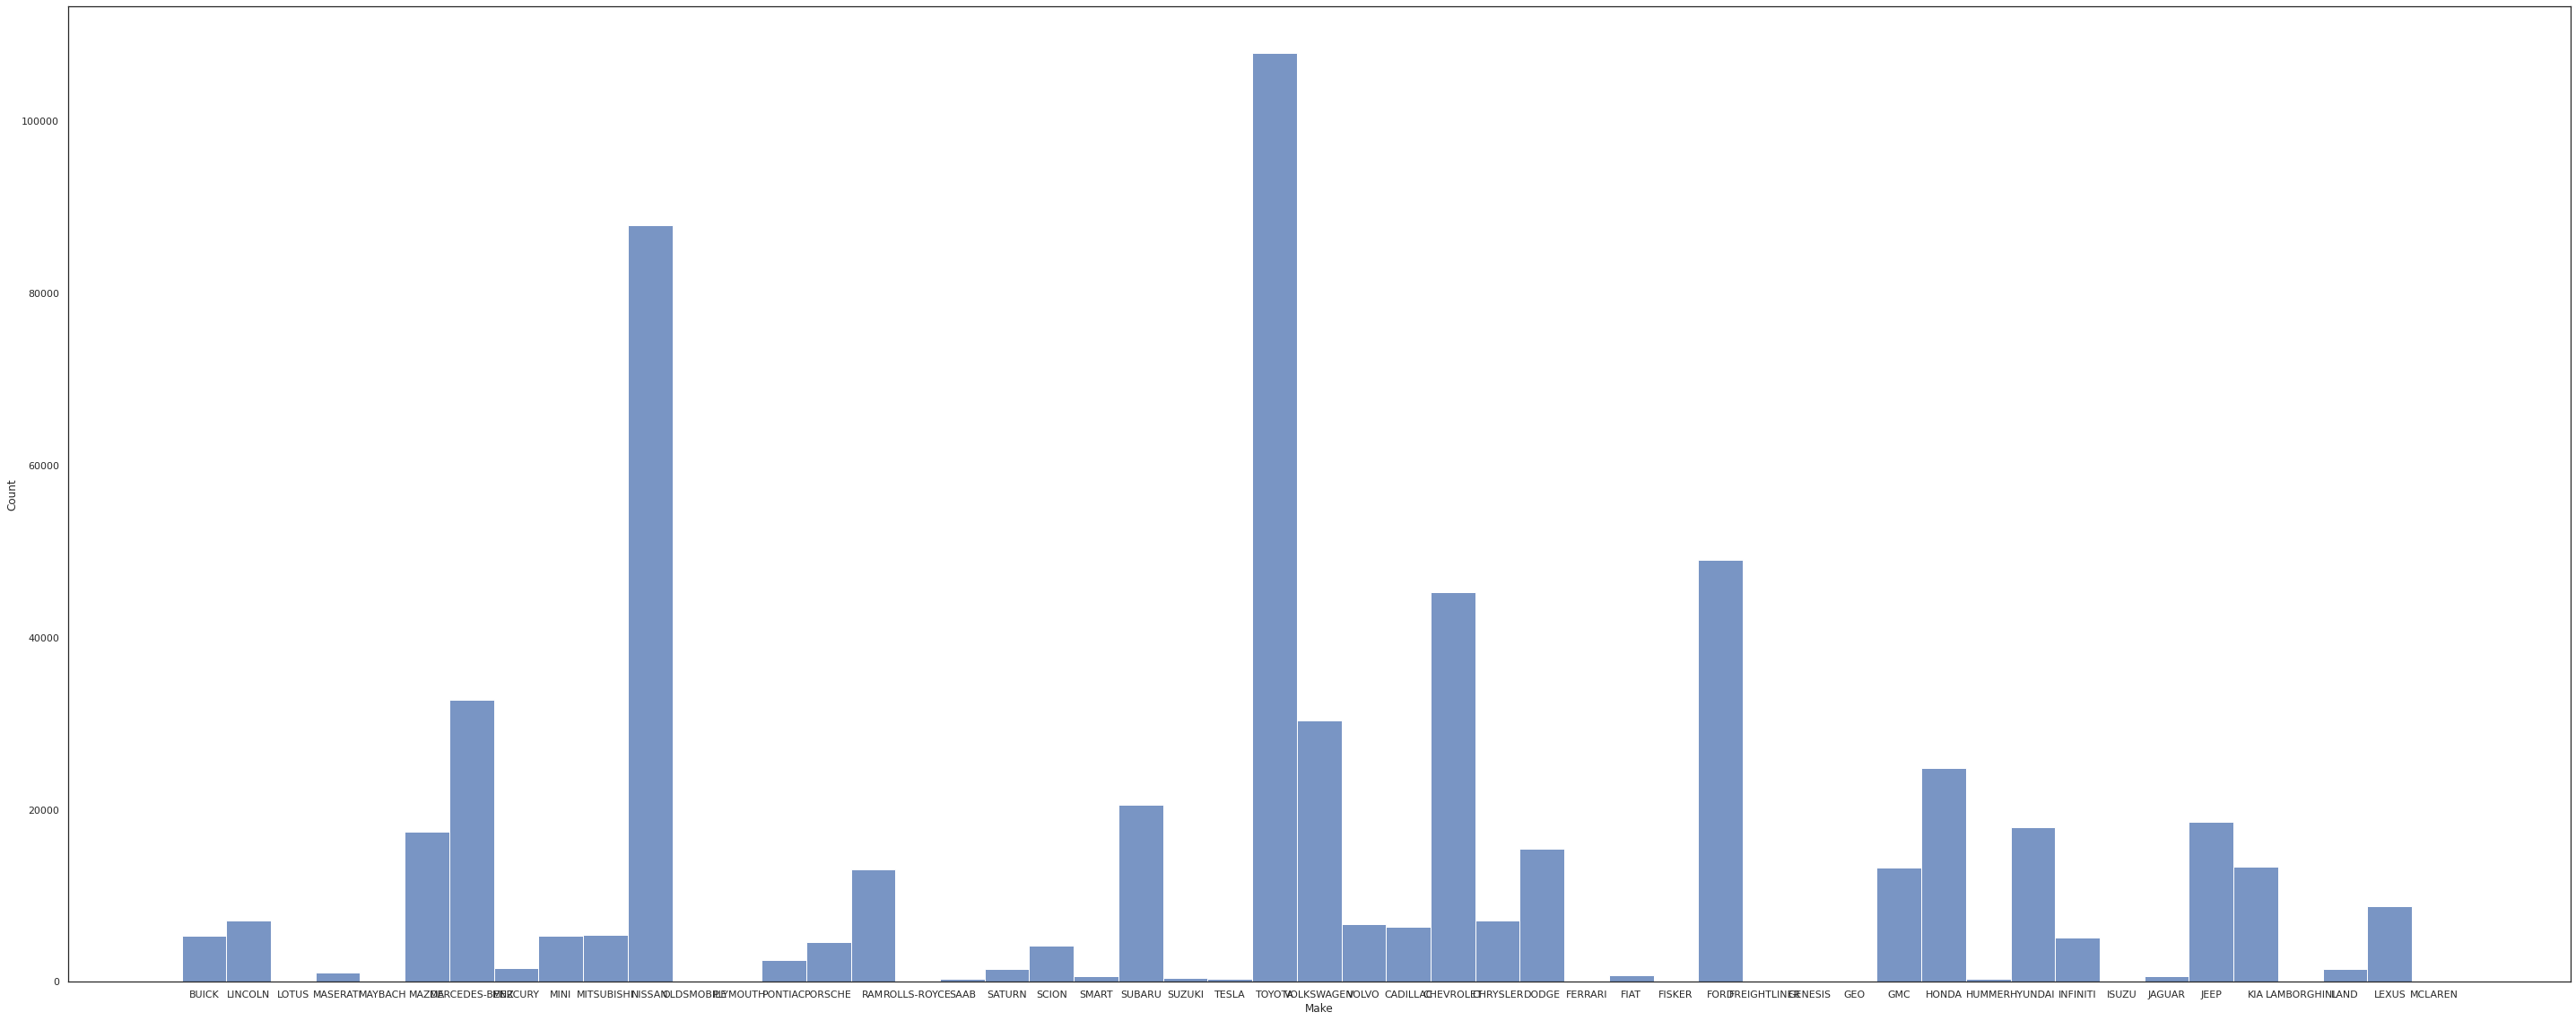

In [ ]:
plt.figure(figsize=(50,20))
sns.histplot(data_cars['Make'])

**How the Price of a certain brand cars' changes according the year of manufacturing?**

/usr/local/lib/python3.7/dist-packages/google/colab/_event_manager.py:28: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


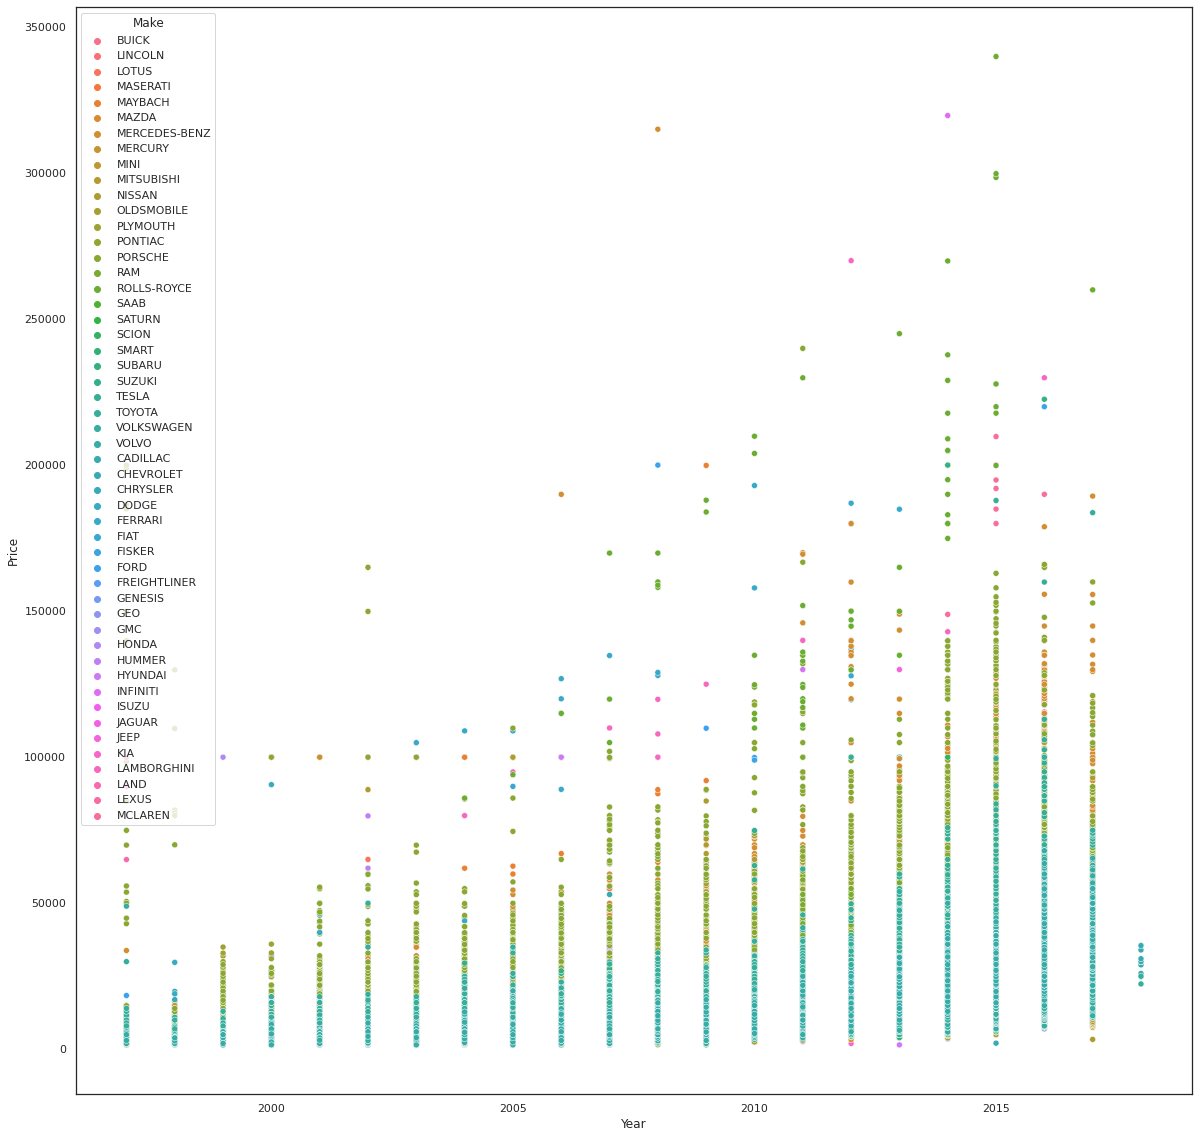

In [ ]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Year',y='Price',hue=data_cars['Make'],data=data_cars)

**Is there is any relationship between Mileage, Year and Price?**

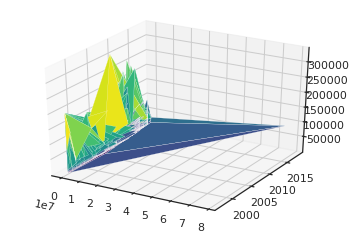

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
three = plt.figure().gca(projection='3d')
three.plot_trisurf(data_cars['Mileage'],data_cars['Year'],data_cars['Price'],cmap=plt.cm.viridis ,linewidth=0.2)
plt.show()s